# W261 Final Project - Clickthrough Rate Prediction

Team 24   
Vivian Lu, Siddhartha Jakkamreddy, Venky Nagapudi, Luca Garre   
Summer 2019, sections 4 and 5   

## Table of Contents

* __Section 1__ - Question Formulation
* __Section 2__ - Algorithm Explanation
* __Section 3__ - EDA & Challenges
* __Section 4__ - Algorithm Implementation
* __Section 5__ - Course Concepts

# __Section 1__ - Question Formulation

## __Introduction__
Online ad is a multibillion dollar industry fueled by large investments and ever increasing performance goals. Targeted advertisement based on users' browsing industry and demographic, ad features such as overall appearance, employed colors and text, and website features such as ad's relative placement in the webpage, sizes, etc., is receiving more and more interest due to its potential for revenue generation. In this context, machine learning is proving resourceful in the understanding of the features that mostly affect users' Click-Through Rates (CTR) and, based on this understanding, in informing the design of ads that maximize performance metrics such as click and convertion rates. Further, machine learning solutions can easily be deployed in a data pipeline enviroment in order to select and offer, on a user-specific basis, the ad which expectedly maximizes the user's interest. 

...

## __Goal of the analysis__
The purpose of the present analysis is to estimate whether a given ad will be clicked based on a set of features describing the ad. 

...

## __Description of the dataset__
The dataset is provided by __[put_reference_to_CriteoLabs]__ and is composed of three files, a `readme.txt`, a `train.txt` and a `test.txt` file, respectively. The readme file contains a brief description of the data. The `train.txt` and `test.txt` files contain the train and test data. Both files are formatted as tab separated value tables, and amount to 45840617 and 6042135 rows for the train and test data, respectively. Following the description of the data, each row represents an ad and contains the following fields (see commands below, these expect the data to be contained in a data folder inside the current working directory):

- 1 binary field indicating whether the ad has been clicked (1) or not (0). This field is available only for the train data;
- 13 fields containing integer features representing counts;
- 26 categorical features. These are hashed as 32 bits keys for anonymization purposes;

From a printout of the first rows of the data files it appears that the data contain no headers. This implies that, with the sole exception of the first binary field, it is not possible to characterize the various fields in terms of the features these represent. It is also noted that rows in the data can have missing values. This is again noticed when looking at the printed lines, as these have a number of entries which is lower than the number of fields specified in the `readme.txt` file. 

...

In [ ]:
#number of rows in the train data
!wc -l data/train.txt

In [ ]:
#number of rows in the test data
!wc -l data/test.txt

In [ ]:
# first row of the train data
!head -1 data/train.txt

In [ ]:
# first row of the test data
!head -1 data/test.txt

# __Section 2__ - Algorithm Explanation

## Logistic regression

Logistic regression belongs to the family of so-called generalized linear models and is by far one of the most known and applied algorithms for the prediction of a target variable $Y$, which represents the possible occurrence of an event of interest $e$. This variable is binary, and usually is encoded such that $Y=1$ represents the occurrence of $e$. More specifically, given a set of explanatory features $X_i$, $i = 1,2, \dots, n$, logistic regression characterizes the probability of occurrence of $e$, $\pi[e] \equiv \pi$, as follows:

\begin{equation}
\pi = \frac{1}{1 + \exp^{-z} }
\end{equation}

where $z = \beta_0 + \sum_{i=1}^n \beta_i X_i$ and $\beta_i$ are model parameters. As can be seen from the equation above, and in compliance with probability rules, $\pi \in (0, 1)$ for any $\beta_i$ and $X_i$, owing to the fact that the exponential function is strictly positive, and considering that the denominator is always higher than the numerator. After some algebraic manipulations an equivalent, and more compact, formulation of the above equation can be obtained as:

\begin{equation}
log\left( \frac{\pi}{1-\pi} \right) = \beta_0 + \sum_{i=1}^n \beta_i X_i
\end{equation}

where the left side is usually referred to as the logit function, $logit(\pi)$, while the right side makes the linear nature of this model explicit. This becomes clearer when considering the decision boundary, i.e., the hypersurface that segments the feature space in positive versus vegative regions. For logistic regression, such boundary is associated with the locus of points in the feature space where $\pi=0.5$, i.e., the model has no preference as to whether a point in this locus should be assigned to the positive or the negative class. Casting $\pi=0.5$ in the left side of the equation above renders a linear equation of the decision boundary in the feature space, in compliance with the linear nature of this model.  

## Log-loss function and parameter estimation

In accordance with established practices in the fields of statistics and machine learning, the parameters $\beta_i$ of the logistic regression model are estimated via maximization of the log-likelihood function. In essence, for a sample of $m$ data points $(x_{ij}, y_j)$, $i = 1,2,\dots,n$, $j = 1,2,\dots,m$, where $x_{ij}$ is the $j$-th record of the $i$-th feature, and $y_j$ is the $j$-th record of the target binary variable $Y$, the parameters $\beta_i$ are estimated such that the log-likelihood function:

\begin{equation}
log\left[ L(\beta_i|y_j) \right] = \frac{1}{m} log\left( \prod_{j = 1}^{m} \pi_j^{y_j} \left( 1-\pi_j \right)^{1-y_j} \right)
\end{equation}

is maximized. The term in the multiplication corresponds to the likelihood function of the Bernoulli distribution for the (degenerate) case of one single trial and number of successes $y_j = 1$ and $y_j = 0$ for success and failure, respectively.

Operationally, the above maximization is usually achieved taking the negative of the log-likelihood function and computing the parameters $\beta_i$ as the argmin of the negated log-likelihood which, after some manipulations, can be written as:

\begin{equation}
\hat{L} = -log\left[ L(\beta_i|y_j) \right] = - \frac{1}{m}\sum_{j=1}^{m} \left[ y_j \cdot log(\pi_j) + (1-y_j) \cdot log(1-\pi_j) \right]
\end{equation}

The right term of the equation, also called Cross-Entropy or log-loss, being a function $\pi$, is ultimately a function of the parameters $\beta_i$ and the features $X_i$ through the logistic regression relationship. The log-loss gives some insights as to the role of this function during estimation of the parameters. Let us assume that for a certain data point, $(x_{ij}, y_j)$, the target variable is equal to $1$. For this given data point, the right term of the equation simplifies to $-log(\pi_j)$. Since this term needs to be minimized, the parameters $\beta_i$ of the model need to be chosen such that $\pi_j$ approaches $1$ as closely as possible. Conversely for an observation $y_j = 0$, minimization of the log-loss, $-log(1 - \pi_j)$, requires $\pi_j$ to approach $0$. This dual role of the log-loss function makes such that likelihood maximization in logistic regression aims to find the set of model parameters which best separate positive from negative observations in the space of the explanatory features $X_i$, in the sense of mapping as closely as possible positive targets to $\pi = 1$ and negative targets to $\pi = 0$. Another appealing property, which turns out to the be of paramount importance for the strategy outlined below, is that this log-loss function is convex, i.e., one and only one point of minimum exists in the space of parameters $\beta_i$.

## Gradient descent

Finding the optimum set of parameters requires a suitable optimization framework. Among various approaches, gradient descent of $`hat{L}$ is a well-established approach for functions. For a certain point of the $n$-th dimensional space of parameters $\beta_i$, the gradient of the log-loss function, $\nabla \hat{L}$ is computed, and thereafter a translation is performed in the parameter space along the gradient direction (the steepest descent).

Gradient descent requires the computation of the gradient. In order to derive its formulation, it is convenient to consider the $i$-th component of $\nabla \hat{L}$, i.e.:

\begin{equation}
\nabla_i \hat{L} = \frac{\partial}{\partial \beta_i} \hat{L}
\end{equation}

Taking the derivative inside the summation and operating on the logarithm yields:

\begin{equation}
\nabla_i \hat{L} = - \frac{1}{m} \sum_{j=1}^{m} \left( \frac{y_j}{\pi_j} - \frac{1-y_j}{1-\pi_j} \right) \frac{\partial \pi_j}{\partial \beta_i}
\end{equation}

The derivative of the probability with respect to the parameter equates to (refer to the initial logistic regression formulation):

\begin{equation}
\frac{\partial \pi_j}{\partial \beta_i} = \frac{\exp^{-z_j}}{(1+\exp^{-z_j})^2} \frac{\partial z_j} {\partial \beta_i} = \frac{\exp^{-z_j}}{1+\exp^{-z_j}} \frac{1}{1+\exp^{-z_j}} \frac{\partial z_j} {\partial \beta_i} = (1-\pi_j) \pi_j \frac{\partial z_j} {\partial \beta_i}
\end{equation}

The derivative of the linear combination term yields:

\begin{equation}
\frac{\partial z_j} {\partial \beta_i} = x_{ij}
\end{equation}

Putting it all together, one finally obtains: 

\begin{equation}
\nabla_i \hat{L} = - \frac{1}{m} \sum_{j=1}^{m} \left[ y_j (1-\pi_j) - (1-y_j) \pi_j \right] x_{ij} = \frac{1}{m}\sum_{j=1}^{m} (\pi_j-y_j) x_{ij}
\end{equation}

for $i = 1,2,\dots,n$. 

Assuming a certain starting point in the space of parameters, $\beta_i^0$, gradient descent first computes the gradient $\nabla \hat{L}$ at this starting point, and shifts the point along the direction of this gradient by computing a new point $\beta_i^1 = \beta_i^0 - \alpha \cdot \nabla \hat{L}$, where $\alpha$ is a learning rate. This is done iteratively until suitable stopping criteria are met.

## Algorithm for scalable implementation of logistic regression

- Assume starting values for logistic parameters $\beta_i^0$
- Set learning parameter $\alpha$
- For each iteration $k$:
- Broadcast parameters $\beta_i^{k}$ to all worker nodes
- Map: emit key-value pairs. Key: index $j$, values: target variable $y_j$ and array of explanatory features $x_{ij}$, for $j = 1,2,\dots,n$
- Map: for every $j = 1,2,\dots,n$ compute probability $\pi_j$ and $\left[ y_j (1-\pi_j) - (1-y_j) \pi_j \right] x_{ij}$
- Reduce: sum over $j$ and divide by $m$, for $i = 1,2,\dots,n$
- Update $\beta_i^{k}$
- Run next iteration

__References:__

Bilder, C.R. and Loughin, T.M. (2015). Analysis of Categorical Data with R. CRC Press. 

Kremonic, Z. (2017). Maximum likelihood and gradient descent demonstration. Blog post. Accessed on July 2019 at https://zlatankr.github.io/posts/2017/03/06/mle-gradient-descent.



Additional resources:

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://ttic.uchicago.edu/~suriya/website-intromlss2018/course_material/Day3b.pdf 

http://www.holehouse.org/mlclass/06_Logistic_Regression.html


# __Section 3__ - EDA & Challenges

For EDA purposes and notebook display, we randomly sampled 5% of the Criteo labs data via code **[Sid: put reference here]**. 
* This sampled code has a total length of 2292037 records. 
* **Delete as needed: address the potential of bias; we could address this via bootstrapping and making sure that our clickthrough rate was robust** 

In [1]:
# imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from os import path

In [2]:
# store path to notebook
PWD = !pwd
PWD = PWD[0]

In [3]:
# create Spark Session
from pyspark.sql import SparkSession
app_name = "final_project"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import col
sqlContext = SQLContext(sc)

In [4]:
# read in sample training data and convert to dataframe

#train_sample = sc.textFile('data/sample_training.txt',2)\
#                 .map(lambda x: x.split('\t'))\
#                 .toDF().cache()

train_sample = sqlContext.read.format("csv") \
               .option("inferSchema", "true") \
               .option("header", "false") \
               .option("delimiter", "\t")\
               .load("data/sample_training.txt")

In [5]:
# head first three rows
train_sample.show(3)

+---+----+---+----+----+-----+----+---+---+---+----+----+----+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+--------+--------+--------+--------+----+----+
|_c0| _c1|_c2| _c3| _c4|  _c5| _c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|    _c14|    _c15|    _c16|    _c17|    _c18|    _c19|    _c20|    _c21|    _c22|    _c23|    _c24|    _c25|    _c26|    _c27|    _c28|    _c29|    _c30|    _c31|_c32|_c33|    _c34|    _c35|    _c36|    _c37|_c38|_c39|
+---+----+---+----+----+-----+----+---+---+---+----+----+----+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+----+--------+--------+--------+--------+----+----+
|  0|   0|  1|null|   0|16597| 557|  3|  5|123|   0|   1|null|   1|8cf07265|7cd19acc|77f2f2e5|d16679b9|4cf72387|fbad5c96|8fb24933|0b153874|a73

We notice immediately from the first three rows that column names are not provided. From the Kaggle contest description, however, we do know that the first column (denoted as `c0`) contains the y variable we are interested in; specifically, a 0 denotes an ad that was not clicked on and a 1 denotes an ad that was clicked on. The following 13 fields (denoted from `_c1` to `_c13`) are numerical features, and the remaining 26 columns (denoted from `_14` to `_39` are categorical features. 

For easier reference in columns, we will rename the following columns as such with the code provided below: 
* `_c0` as `CTR` to denote our y variable of interest (click-through rate). 
* Numerical columns `_1` to `_13` to be denoted as `Var1` to `Var13`. 
* Categorical columns `_1r` to `_39` to be denoted as `Var14` to `Var39`. 

In [6]:
####
# Renaming of columns for easy reference 
#### 
train_sample = train_sample.withColumnRenamed("_c0", "CTR") \
       .withColumnRenamed("_c1", "Var1") \
       .withColumnRenamed("_c2", "Var2") \
       .withColumnRenamed("_c3", "Var3") \
       .withColumnRenamed("_c4", "Var4") \
       .withColumnRenamed("_c5", "Var5") \
       .withColumnRenamed("_c6", "Var6") \
       .withColumnRenamed("_c7", "Var7") \
       .withColumnRenamed("_c8", "Var8") \
       .withColumnRenamed("_c9", "Var9") \
       .withColumnRenamed("_c10", "Var10") \
       .withColumnRenamed("_c11", "Var11") \
       .withColumnRenamed("_c12", "Var12") \
       .withColumnRenamed("_c13", "Var13") \
        .withColumnRenamed("_c14", "Var14") \
        .withColumnRenamed("_c15", "Var15") \
        .withColumnRenamed("_c16", "Var16") \
        .withColumnRenamed("_c17", "Var17") \
        .withColumnRenamed("_c18", "Var18") \
        .withColumnRenamed("_c19", "Var19") \
        .withColumnRenamed("_c20", "Var20") \
        .withColumnRenamed("_c21", "Var21") \
        .withColumnRenamed("_c22", "Var22") \
        .withColumnRenamed("_c23", "Var23") \
        .withColumnRenamed("_c24", "Var24") \
        .withColumnRenamed("_c25", "Var25") \
        .withColumnRenamed("_c26", "Var26") \
        .withColumnRenamed("_c27", "Var27") \
        .withColumnRenamed("_c28", "Var28") \
        .withColumnRenamed("_c29", "Var29") \
        .withColumnRenamed("_c30", "Var30") \
        .withColumnRenamed("_c31", "Var31") \
        .withColumnRenamed("_c32", "Var32") \
        .withColumnRenamed("_c33", "Var33") \
        .withColumnRenamed("_c34", "Var34") \
        .withColumnRenamed("_c35", "Var35") \
        .withColumnRenamed("_c36", "Var36") \
        .withColumnRenamed("_c37", "Var37") \
        .withColumnRenamed("_c38", "Var38") \
        .withColumnRenamed("_c39", "Var39") \

In [7]:
# Showing top 20 rows of the numerical columns 

train_sample.select("CTR", "Var1", "Var2", "Var3", "Var4", "Var5", "Var6", "Var7", "Var8", "Var9", "Var10", "Var11", "Var12", "Var13").show()


+---+----+----+----+----+-----+----+----+----+----+-----+-----+-----+-----+
|CTR|Var1|Var2|Var3|Var4| Var5|Var6|Var7|Var8|Var9|Var10|Var11|Var12|Var13|
+---+----+----+----+----+-----+----+----+----+----+-----+-----+-----+-----+
|  0|   0|   1|null|   0|16597| 557|   3|   5| 123|    0|    1| null|    1|
|  0|   1|   0|   1|null| 1427|   3|  16|  11|  50|    0|    2|    1| null|
|  0|null|   1|null|null|23255|null|   0|   1|  73| null|    0| null| null|
|  0|   0|  37|  23|   9| 1635|  84|   2|  17| 109|    0|    2| null|   50|
|  0|   2|   0|   9|   5|   44|   5|   2|   4|   5|    2|    2| null|    5|
|  0|   0|   1|  14|   2|  120| 733|   0|  12| 606|    0|    0|   98|    2|
|  0|null|   1|null|null| null|null|null|   0|null| null| null| null| null|
|  0|   0|3295|null|   0| 4546| 149|  11|  30| 220|    0|    3| null|    2|
|  0|   1|   1|   4|  17|  108|  22|   1|  24|  22|    1|    1| null|   22|
|  0|null|  19|  32|   0| 1994|null|   0|  19|  26| null|    0| null|    3|
|  0|null|  

In [8]:
# Showing top 20 rows of the categorical columns 

train_sample.select('Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21',
                    'Var22','Var23','Var24','Var25','Var26','Var27','Var28','Var29','Var30',
                   'Var31','Var32','Var33','Var34','Var35','Var36','Var37','Var38','Var39').show()

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|   Var14|   Var15|   Var16|   Var17|   Var18|   Var19|   Var20|   Var21|   Var22|   Var23|   Var24|   Var25|   Var26|   Var27|   Var28|   Var29|   Var30|   Var31|   Var32|   Var33|   Var34|   Var35|   Var36|   Var37|   Var38|   Var39|
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|8cf07265|7cd19acc|77f2f2e5|d16679b9|4cf72387|fbad5c96|8fb24933|0b153874|a73ee510|0095a535|3617b5f5|9f32b866|428332cf|b28479f6|83ebd498|31ca40b6|e5ba7672|d0e5eb07|    null|    null|dfcfc3fa|ad3062eb|32c7478e|aee52b6f|    null|    null|
|05db9164|26a88120|615e3e4e|2788fed8|4cf72387|7e0ccccf|3

## Brief Statistics and Coverage of Data

In our code below, we depict brief statistics about our sampled data: 
* A total of 2,292,037 rows (~5% of the training data) have been sampled out. 
* Our sampled data shows a click through rate of approximately 25% 
* Coverage: For the most part, most of our columns show pretty good coverage (>95%). We do see, however, a troubling number of Null (missing) values for a couple columns. 
    * Var3, Var13, Var4, and Var6 have around 25% of their values as Null. 
    * Perhaps the most alarming: columns Var32, Var33, Var38, Var39, Var10, Var1, Var35, and Var12 have less than 50% of their values as non-Null. 
    
A significant challenge for us will involve having to deal with high number of Null values in some of our columns. For numerical values, it is certainly possible to imput a number to fill in for Null values, but this challenge gets tricky with categorical variables. The handling of null values for categorical variables will be discussed in **[insert section here]**. 

In [9]:
# Getting a count of the total number of rows in our sampled data. 
total_count = train_sample.count()
total_count

2292037

In [10]:
# Calculating approximate click through rate of our sampled training data 
train_sample.filter(train_sample.CTR==1).count()/total_count

0.2564675003064959

In [44]:
# Calculating nulls in our dataset to understand coverage of our data: 

from pyspark.sql.functions import col, count, isnan, stddev, lit, sum

coverage = train_sample.agg(*[
    (count(c)/total_count).alias(c)    # vertical (column-wise) operations in SQL ignore NULLs
    for c in train_sample.columns
]).toPandas()

coverage_summary = coverage.T
coverage_summary.columns = ['Coverage_nonNull']
coverage_summary.sort_values(by='Coverage_nonNull', ascending=False)

,Coverage_nonNull
CTR,1.000000
Var14,1.000000
Var36,1.000000
Var31,1.000000
Var30,1.000000
Var28,1.000000
Var27,1.000000
Var26,1.000000
Var24,1.000000
Var23,1.000000


## Numerical Variables

### Basic Statistics
* We calculate basic statistics to summarize our numerical variables: count of observations that have the variable, the mean of the variable, the standard deviation of the variable, and the min and max of the variable. 
* We note that the range for each variable is different; although we do not know the exact definition of what each variable stands for, we can tell that the range of each variable can vary greatly. 
* **To check: Variable 2 has a min of -2? How is this possible given that these are all counts?** 
* **To confirm: rough 95% confidence interval guesstimates** 

In [12]:
# Basic statistics 

#df1.agg({"x": "max"}).collect()[0]
numerical_cols = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13']

numerical_stats = train_sample.describe(numerical_cols).toPandas()
numerical_stats.T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Var1,1253362,3.52458746954192,9.456074158477476,0,1575
Var2,2292037,105.5236778463873,387.9460727424658,-2,19219
Var3,1799718,27.030229180349366,402.6173876100675,0,65535
Var4,1794652,7.327119129502544,8.845164661144699,0,969
Var5,2232828,18536.03390498507,69153.1755142129,0,2634953
Var6,1779597,115.58777689555556,337.0288166711634,0,66619
Var7,2193136,16.459486324605496,70.80815785839796,0,34536
Var8,2290882,12.536948651218177,16.92910564553372,0,4513
Var9,2193136,105.99417500784266,219.74396942043634,0,18345


In [60]:
#train_sample.select('CTR','Var1').groupBy('CTR').count().collect()[0]
# Is there a smarter way to do this...?
grouped_CTR0 = []
grouped_CTR1 = []

for p in range(0, len(numerical_cols)): 
    g1_avg, g0_avg=train_sample.groupBy('CTR').agg({numerical_cols[p]:"avg"}).collect()
    g1_std, g0_std=train_sample.groupBy('CTR').agg({numerical_cols[p]:"stddev"}).collect()
    g1_count, g0_count = train_sample.groupBy('CTR').agg({numerical_cols[p]:"count"}).collect()
    g1_min, g0_min = train_sample.groupBy('CTR').agg({numerical_cols[p]:"min"}).collect()
    g1_max, g0_max = train_sample.groupBy('CTR').agg({numerical_cols[p]:"max"}).collect()
    grouped_CTR1.append({'Column': numerical_cols[p], 'avg_CTR1': g1_avg[1], 'std_CTR1': g1_std[1], 
                       'count_CTR1': g1_count[1], 'min_CTR1': g1_min[1], 'max_CTR1': g1_max[1]})
    grouped_CTR0.append({'Column': numerical_cols[p], 'avg_CTR0': g0_avg[1], 'std_CTR0': g0_std[1],
                       'count_CTR0': g0_count[1], 'min_CTR0': g0_min[1], 'max_CTR0': g0_max[1]})

In [68]:
CTR0_df = pd.DataFrame(grouped_CTR0)
CTR1_df = pd.DataFrame(grouped_CTR1)
merged_group_agg = CTR0_df.merge(CTR1_df, how='left', on='Column')[['Column','avg_CTR0','avg_CTR1','std_CTR0','std_CTR1','min_CTR0','min_CTR1','max_CTR0','max_CTR1','count_CTR0','count_CTR1']]
merged_group_agg

,Column,avg_CTR0,avg_CTR1,std_CTR0,std_CTR1,min_CTR0,min_CTR1,max_CTR0,max_CTR1,count_CTR0,count_CTR1
0,Var1,2.946473,4.790206,8.674151,10.868277,0,0,1575,908,860362,393000
1,Var2,95.612975,134.256090,361.190633,455.522574,-2,-2,19219,16956,1704204,587833
2,Var3,23.801411,37.103464,248.094061,689.683142,0,0,65535,65535,1362871,436847
3,Var4,7.601784,6.499002,9.112409,7.928093,0,0,969,295,1347666,446986
4,Var5,21823.328636,9209.995004,76456.296149,40591.419351,0,0,2634953,1906516,1650907,581921
5,Var6,136.768530,64.598590,377.688449,199.877834,0,0,66619,17917,1257313,522284
6,Var7,13.125326,25.870308,63.142022,88.273909,0,0,34536,11839,1619399,573737
7,Var8,12.799855,11.775066,18.047062,13.133923,0,0,4513,733,1703164,587718
8,Var9,103.372396,113.394268,214.584881,233.533582,0,0,18345,11996,1619399,573737
9,Var10,0.537784,0.793885,0.642230,0.739217,0,0,8,7,860362,393000


In [69]:
# rough guesstimating with 95% CI (mean +/- 1.96 * SD/sqrt(N))
# heavy assumptions here considering i'm using 1.96 as the t-statistic, but we have a high enough count in each group 
merged_group_agg['lowerCI_CTR0']=merged_group_agg['avg_CTR0']-((1.96)*(merged_group_agg['std_CTR0']/np.sqrt(merged_group_agg['count_CTR0'])))
merged_group_agg['upperCI_CTR0']=merged_group_agg['avg_CTR0']+((1.96)*(merged_group_agg['std_CTR0']/np.sqrt(merged_group_agg['count_CTR0'])))
merged_group_agg['lowerCI_CTR1']=merged_group_agg['avg_CTR1']-((1.96)*(merged_group_agg['std_CTR1']/np.sqrt(merged_group_agg['count_CTR1'])))
merged_group_agg['upperCI_CTR1']=merged_group_agg['avg_CTR1']+((1.96)*(merged_group_agg['std_CTR1']/np.sqrt(merged_group_agg['count_CTR1'])))
merged_group_agg

# Rough guess: Almost all of the numerical variables look pretty drastic in difference between the two groups of CTR = 0 or 1 
# The only 2 variables that might not give enough significance compared to the other columns would be Var4, Var8, and Var10 

,Column,avg_CTR0,avg_CTR1,std_CTR0,std_CTR1,min_CTR0,min_CTR1,max_CTR0,max_CTR1,count_CTR0,count_CTR1,lowerCI_CTR0,upperCI_CTR0,lowerCI_CTR1,upperCI_CTR1
0,Var1,2.946473,4.790206,8.674151,10.868277,0,0,1575,908,860362,393000,2.928143,2.964802,4.756226,4.824186
1,Var2,95.612975,134.256090,361.190633,455.522574,-2,-2,19219,16956,1704204,587833,95.070685,96.155265,133.091591,135.420588
2,Var3,23.801411,37.103464,248.094061,689.683142,0,0,65535,65535,1362871,436847,23.384882,24.217940,35.058240,39.148689
3,Var4,7.601784,6.499002,9.112409,7.928093,0,0,969,295,1347666,446986,7.586399,7.617169,6.475760,6.522244
4,Var5,21823.328636,9209.995004,76456.296149,40591.419351,0,0,2634953,1906516,1650907,581921,21706.699242,21939.958031,9105.701252,9314.288757
5,Var6,136.768530,64.598590,377.688449,199.877834,0,0,66619,17917,1257313,522284,136.108342,137.428719,64.056505,65.140675
6,Var7,13.125326,25.870308,63.142022,88.273909,0,0,34536,11839,1619399,573737,13.028074,13.222577,25.641889,26.098727
7,Var8,12.799855,11.775066,18.047062,13.133923,0,0,4513,733,1703164,587718,12.772751,12.826959,11.741487,11.808644
8,Var9,103.372396,113.394268,214.584881,233.533582,0,0,18345,11996,1619399,573737,103.041890,103.702901,112.789973,113.998563
9,Var10,0.537784,0.793885,0.642230,0.739217,0,0,8,7,860362,393000,0.536427,0.539141,0.791574,0.796197


### Histograms 
* We also plot the histograms of each of the numerical variables. 
* We note that pretty much all of the numerical variables are skewed right; most of the observations generally are centered around the lower range of the values and the remaining higher values are tailed off to the right. 
* As the range of all variables varies widely across all variables, we plan to standardize the numerical variables by **[insert standardization method]** such that not one variable overpowers over the other numerical variables solely due to scale. 

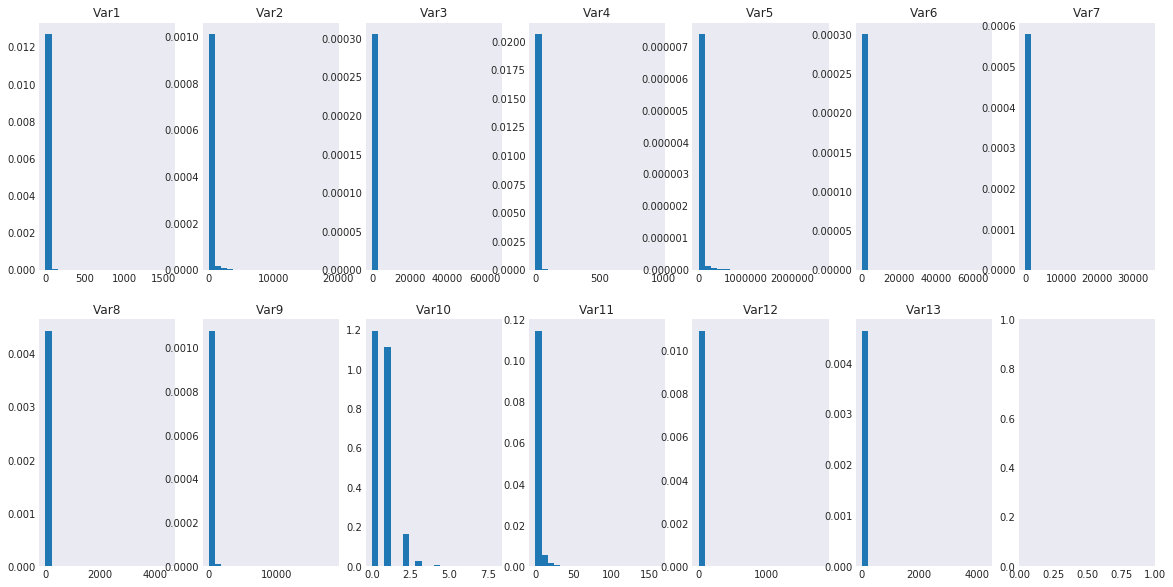

In [14]:
# Histogram of numerical variables 

# Note that the last chart is empty as we only have 13 numerical variables. 

import seaborn as sns 

%matplotlib inline 

numerical_cols = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13']

fig, axs = plt.subplots(2,7, figsize=(20,10))
axs = axs.ravel()
for p in range(0,len(numerical_cols)): 
    list_values = train_sample.select(numerical_cols[p]).rdd.flatMap(lambda x: x).collect()
    cleaned_list = [x for x in list_values if x is not None]
    axs[p].hist(cleaned_list, bins=20, density=True)
    axs[p].set_title(numerical_cols[p])


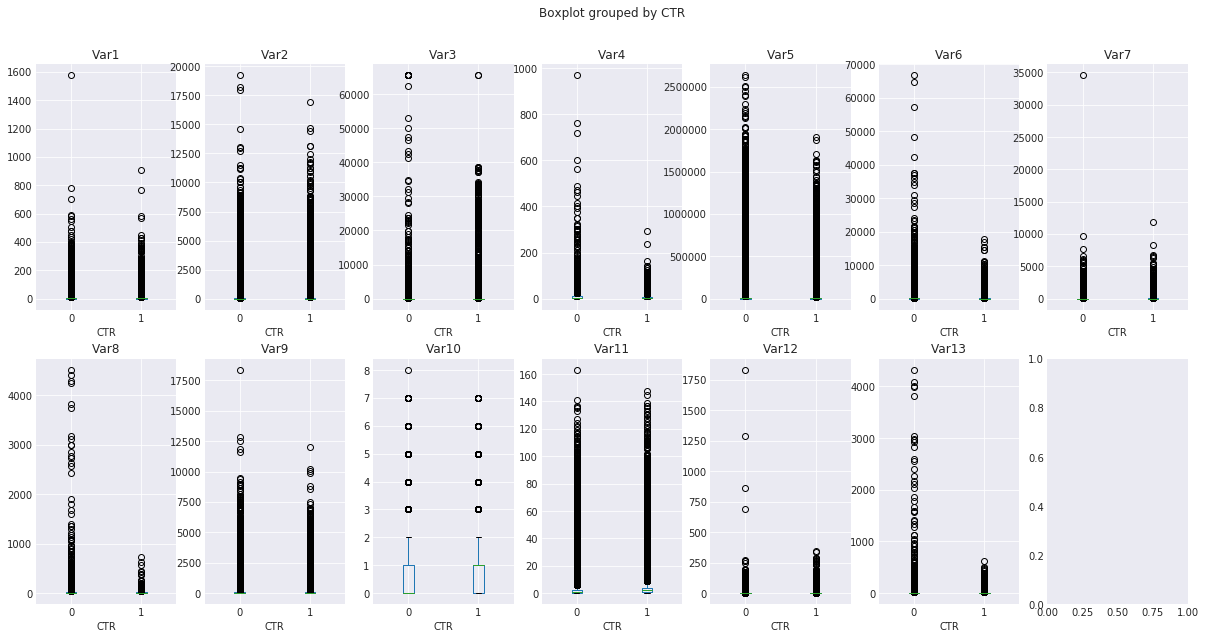

In [20]:
# boxplot (see if we can discern any difference for the numerical variables )

#####
# Delete this later?: these plots are so hard to discern by eye, these boxplots feel useless anyways. 
#####

fig, axs = plt.subplots(2,7, figsize=(20,10))
axs = axs.ravel() 
for p in range(0, len(numerical_cols)): 
    train_sample.select('CTR',numerical_cols[p]).toPandas().dropna(axis=0).boxplot(column = numerical_cols[p], by='CTR', ax=axs[p])
    axs[p].set_title(numerical_cols[p])
    

## Categorical Variables and Cardinality

In [71]:
categorical_cols = ['Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22',
                    'Var23','Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31',
                   'Var32','Var33','Var34','Var35','Var36','Var37','Var38','Var39']

In [74]:
# Count distinct values in each categorical column 

distinct_temp = []
for column in categorical_cols: 
    distinct_temp.append({'column':column, 'count_distinct': train_sample.select(column).distinct().count()})


In [75]:
distinct_df = pd.DataFrame(distinct_temp)
distinct_df.sort_values(by='count_distinct', ascending=False)

,column,count_distinct
2,Var16,753315
11,Var25,661596
20,Var34,588319
15,Var29,489035
3,Var17,258094
23,Var37,69117
25,Var39,47492
9,Var23,42422
6,Var20,11741
14,Var28,10943


In [ ]:
# cumulative summation: 
# Action items from here: take the top features 
# compare against ctr==0 vs ctr==1 

In [ ]:
# Cramer's V? 

In [ ]:
# 